In [ ]:
# Google Drive'ni ulash
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



df = pd.read_excel('/content/drive/MyDrive/newcars.xlsx')
df.head(20)


,company,body-style,price
0,alfa-romero,convertible,13495.0
1,alfa-romero,convertible,16500.0
2,alfa-romero,hatchback,16500.0
3,audi,sedan,13950.0
4,audi,sedan,17450.0
5,audi,sedan,15250.0
6,audi,wagon,18920.0
7,bmw,sedan,16430.0
8,bmw,sedan,16925.0
9,bmw,sedan,20970.0


In [ ]:
df.dropna(subset=['price'], inplace=True)

df_encoded = pd.get_dummies(df, columns=['company', 'body-style'], drop_first=True)

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:

# 8. Bashorat va baholash
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


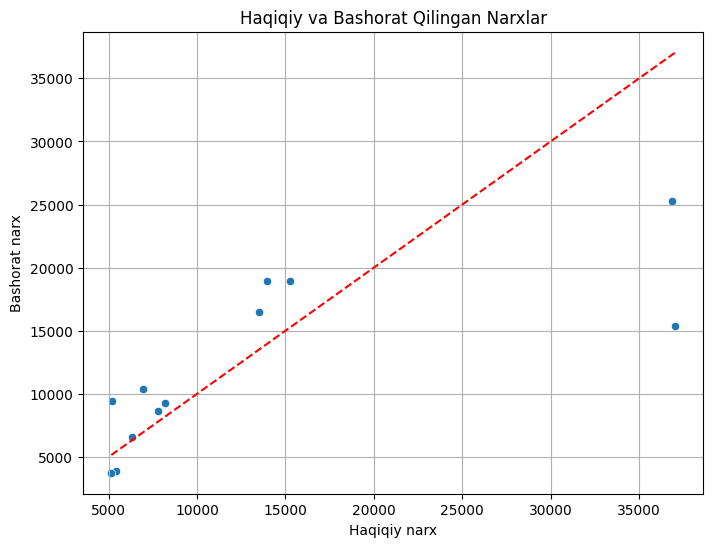

In [ ]:

# 9. Vizualizatsiya: haqiqiy vs bashorat qilingan qiymatlar
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Haqiqiy narx")
plt.ylabel("Bashorat narx")
plt.title("Haqiqiy va Bashorat Qilingan Narxlar")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()



In [1]:
# !pip install python-docx


In [ ]:

from docx import Document
# 10. DOCX hisobotni yaratish va saqlash
doc = Document()
doc.add_heading('Avtomobil Narxlarini Bashorat Qilish Hisoboti', 0)

doc.add_paragraph('1. Excel fayldan ma’lumotlar yuklandi.')
doc.add_paragraph('2. Kategorik ustunlar kodlandi (One-Hot Encoding).')
doc.add_paragraph('3. Chiziqli regressiya modeli qurildi.')
doc.add_paragraph(f'4. Mean Squared Error (MSE): {mse:.2f}')
doc.add_paragraph(f'5. R² score: {r2:.2f}')
doc.add_paragraph('6. Xulosa: Model asosiy xususiyatlar bo‘yicha avtomobil narxini bashorat qilishga mos.')

# Faylni saqlash
doc.save('/content/drive/MyDrive/avto_narx_hisobot.docx')
